# 02 – Descriptive Analytics & Exploratory Data Analysis (EDA)
### Car Price Prediction Using Machine Learning
Group Assignment 02 - CCS3012 - Data Analytics  
Submission Date: 16th September 2025

---

### **Group 11**
-  **FC211034 - N.D. Samararathne Kodikara**
-  **FC211013 - N.W.V. Tharindu Pabasara**
-  **FC211025 - W.M.M.C.B. Wijesundara**



---

### **Supervisor**
**Ms. Dilmi Praveena**  
*Faculty of Computing*  
*University of Sri Jayewardenepura*

---



## 📌 Objectives

This notebook builds upon the cleaned dataset produced in **Notebook 01 — Data Exploration & Cleaning**.  
The focus here is To perform a comprehensive exploratory analysis of the car price dataset, including:

---

- **Numeric features**: Understand distributions, central tendency, spread, and outliers.

- **Categorical features**: Explore frequency counts, rare categories, and overall structure.

- **Bivariate relationships**: Investigate how features relate to the target (price) and to each other.

- **Visualizations**: Generate informative plots to reveal trends, patterns, and potential anomalies.
- **Feature engineering insights**: Identify opportunities for new features, transformations, or interactions based on observed patterns and relationships.
---


### 📂 Input  
- `clean_data.csv` saved in `Data/processed/`  
---

### 📊 Dataset Overview
**Dataset:** Car price dataset cleaned.  
**columns include**:   
- `id`, `price` (target variable),  `levy`,  `manufacturer`,  `model`,  `prod_year`,  `category`,  `leather_interior`,  `fuel_type`, `engine_volume`,  `mileage`,  `cylinders`,  `gear_box_type`,  `drive_wheels`,  `doors`,  `wheel`, `color`,  `airbags`,  `turbo` (derived in Notebook 01)


> **Dataset stats:** 19,237 rows × 19 features | Target variable: `price` | Problem type: Regression


# Setup & imports

In [67]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Statistical functions
from scipy import stats

from prettytable import PrettyTable # For creating formatted tables in the console.
from tabulate import tabulate
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [68]:
# Next we load the cleaned dataset.
df = pd.read_csv("./Data/processed/clean_data.csv")

In [69]:
# Prints the first 5 rows of the DataFrame.
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,45654403,13328,1399.0,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6,automatic,4x4,04-may,left wheel,silver,12,False
1,44731507,16621,1018.0,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6,tiptronic,4x4,04-may,left wheel,black,8,False
2,45774419,8467,0.0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4,variator,front,04-may,right-hand drive,black,2,False
3,45769185,3607,862.0,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4,automatic,4x4,04-may,left wheel,white,0,False
4,45809263,11726,446.0,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4,automatic,front,04-may,left wheel,silver,4,False


In [70]:
# Prints the name of each column in the dataset, the number of non-null values it contains, and its data type.
def df_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]

    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        table.add_row([col, non_null_count, dtype])

    print(table)

df_info(df)

+------------------+----------------+---------+
|      Column      | Non-Null Count |  Dtype  |
+------------------+----------------+---------+
|        id        |     15697      |  int64  |
|      price       |     15697      |  int64  |
|       levy       |     15697      | float64 |
|   manufacturer   |     15697      |  object |
|      model       |     15697      |  object |
|    prod_year     |     15697      |  int64  |
|     category     |     15697      |  object |
| leather_interior |     15697      |  object |
|    fuel_type     |     15697      |  object |
|  engine_volume   |     15697      | float64 |
|     mileage      |     15697      |  int64  |
|    cylinders     |     15697      |  int64  |
|  gear_box_type   |     15697      |  object |
|   drive_wheels   |     15697      |  object |
|      doors       |     15697      |  object |
|      wheel       |     15697      |  object |
|      color       |     15697      |  object |
|     airbags      |     15697      |  i

💡 **Observations:**  
- The data set appears unchanged and matches the previously saved version.

Le't start...

# Numerical Features
**Features to analyze: price, levy, mileage, engine_volume, cylinders, airbags, prod_year**

## Analyze `price`

In [71]:
# Summary statistics
price_stats = df['price'].describe()
print("🔹 Price Summary:")
print(price_stats)

# other metrics
print("\n🔹 Skewness:", df['price'].skew())
print("🔹 Kurtosis:", df['price'].kurt())

🔹 Price Summary:
count    1.569700e+04
mean     2.028445e+04
std      2.108237e+05
min      1.000000e+00
25%      7.527000e+03
50%      1.426900e+04
75%      2.338900e+04
max      2.630750e+07
Name: price, dtype: float64

🔹 Skewness: 123.52934090055949
🔹 Kurtosis: 15402.583002061287


💡 **Observations:**  
- The mean price is around $20,284, while the median is $14,269, indicating a right-skewed distribution.
- The minimum price is $1 (likely an error or placeholder), and the maximum is $26,307,500, suggesting the presence of extreme outliers.  
- The standard deviation is very high ($210,823), reflecting large variability in car prices.

---
- Skewness = 123.53 → extremely right-skewed.

- Kurtosis = 15,402.58 → heavy tails, confirming extreme outliers.

> *🧠 we will Consider log transformation now and outlier handling in Feature engineering*

In [72]:
# Initialize list for skewed features
skewed_features = []

# Example: add 'price' after detecting skew
skewed_features.append('price')

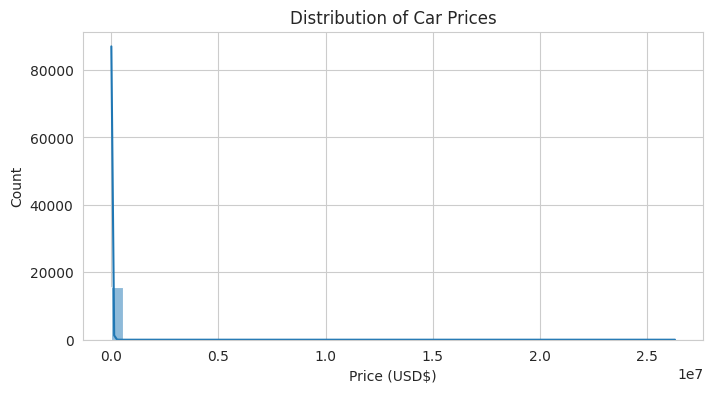

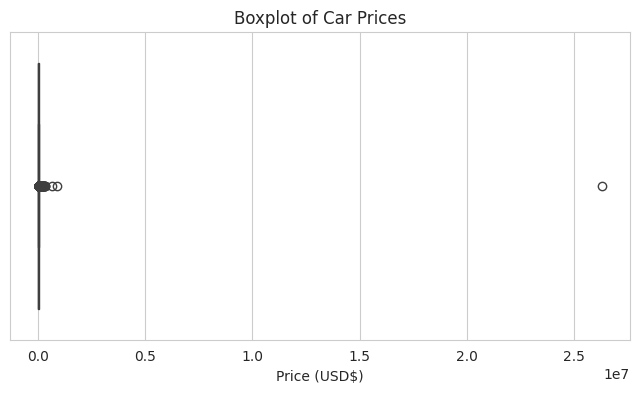

In [73]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (USD$)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Prices")
plt.xlabel("Price (USD$)")
plt.show()


💡 **Observations:**  
- The raw price distribution is highly skewed, with extreme outliers reaching up to 26M USD.
This makes the plots look compressed, hiding the majority of the data.
> *🧠 To better visualize the bulk of the dataset, we zoom into the 95th percentile, which removes the top 5% of extreme values from the plot (without actually deleting them from the dataset).*

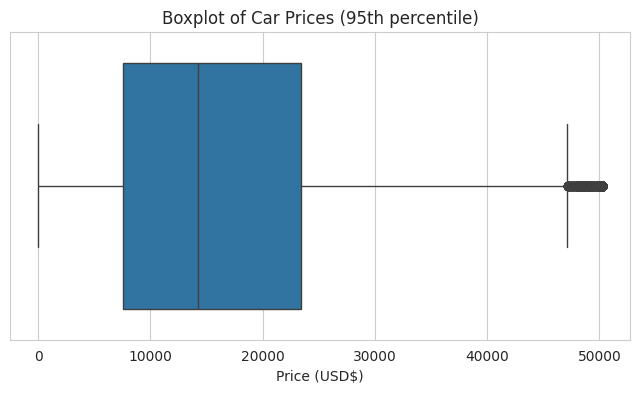

In [74]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'].clip(upper=df['price'].quantile(0.95)))
plt.title("Boxplot of Car Prices (95th percentile)")
plt.xlabel("Price (USD$)")
plt.show()


💡 **Observations:**  

- The majority of car prices fall between $18,000 and $24,000.

- Extreme luxury or rare vehicles drive the distribution’s long right tail.

- The bulk of the dataset represents typical consumer vehicles, not high-end outliers.

## Analyze `levy`

In [75]:
# Summary stats
print("🔹 Levy Summary:")
print(df['levy'].describe())

# Skewness & Kurtosis
print("\n🔹 Skewness:", df['levy'].skew())
print("🔹 Kurtosis:", df['levy'].kurt())

🔹 Levy Summary:
count    15697.000000
mean       562.179716
std        558.754267
min          0.000000
25%          0.000000
50%        639.000000
75%        862.000000
max      11714.000000
Name: levy, dtype: float64

🔹 Skewness: 2.9599056127478742
🔹 Kurtosis: 38.99045800451407


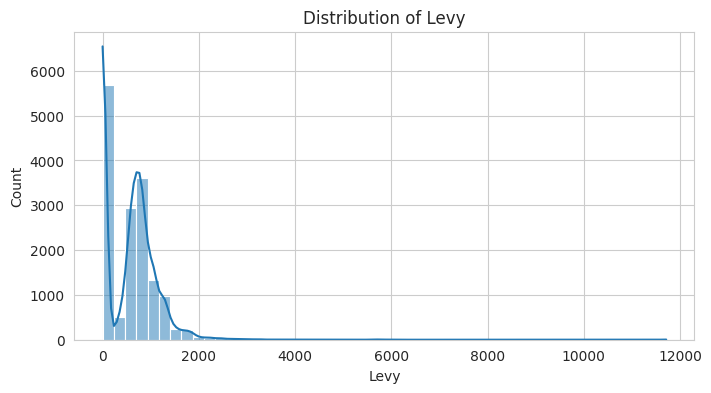

In [76]:

# Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['levy'], bins=50, kde=True)
plt.title("Distribution of Levy")
plt.xlabel("Levy")
plt.show()

**💡 Observations**

- Median (639) is higher than the mean (562), showing a concentration of lower values with a long right tail.

- 25% of cars have levy = 0.

- Distribution is moderately skewed (Skewness ≈ 2.96) with heavy tails (Kurtosis ≈ 39), suggesting strong outliers.

- The maximum levy (11,714) is far beyond the 75th percentile (862), indicating presence of extreme values.

> *🧠 Investigate whether levy = 0 should be treated as missing.*

### 🔍 Investigating levy = 0


> Objective: Determine whether levy = 0 represents a true zero or indicates missing/unknown values.

In [77]:
def zero_count_percentage(df, column):
    zero_count = (df[column] == 0).sum()
    zero_pct = zero_count / len(df) * 100
    print(f"🔹 {column} = 0 → {zero_count} rows ({zero_pct:.2f}%)")

# Example usage:
zero_count_percentage(df, 'levy')

🔹 levy = 0 → 5659 rows (36.05%)


💡 **Observations:**  
- levy = 0 occurs in 5,659 rows, which is 36.05% of the dataset.
- This is a substantial portion, so we need to investigate whether these zeros are true exemptions (e.g., for certain car years or categories) or missing/unknown values.

> *🧠 Further analysis with car age, price, and category will guide whether to keep, impute, or flag these zeros in preprocessing.*

In [78]:
# 🍀 Create car_age column
current_year = 2025  # or use datetime.now().year
df['car_age'] = current_year - df['prod_year']

# Define bins and labels
bins = [0, 5, 10, 15, 20, 30, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-50']
df['car_age_group'] = pd.cut(df['car_age'], bins=bins, labels=labels, right=True)

# Proportion of levy=0 by age group
levy_zero_by_age = df.groupby('car_age_group')['levy'].apply(lambda x: (x == 0).mean())

# Convert to DataFrame for tabulate
levy_table = levy_zero_by_age.reset_index()
levy_table.columns = ['Car Age Group', 'Proportion of levy=0']

# Print table
print(tabulate(levy_table, headers='keys', tablefmt='grid', showindex=False))


+-----------------+------------------------+
| Car Age Group   |   Proportion of levy=0 |
+=================+========================+
| 0-5             |              0.186047  |
+-----------------+------------------------+
| 6-10            |              0.0910034 |
+-----------------+------------------------+
| 11-15           |              0.215335  |
+-----------------+------------------------+
| 16-20           |              0.648907  |
+-----------------+------------------------+
| 21-30           |              0.950131  |
+-----------------+------------------------+
| 31-50           |              0.97619   |
+-----------------+------------------------+


/tmp/ipykernel_224/919743323.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  levy_zero_by_age = df.groupby('car_age_group')['levy'].apply(lambda x: (x == 0).mean())


/tmp/ipykernel_224/3806117317.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  levy_counts = df.groupby('car_age_group')['levy_flag'].value_counts().unstack(fill_value=0)


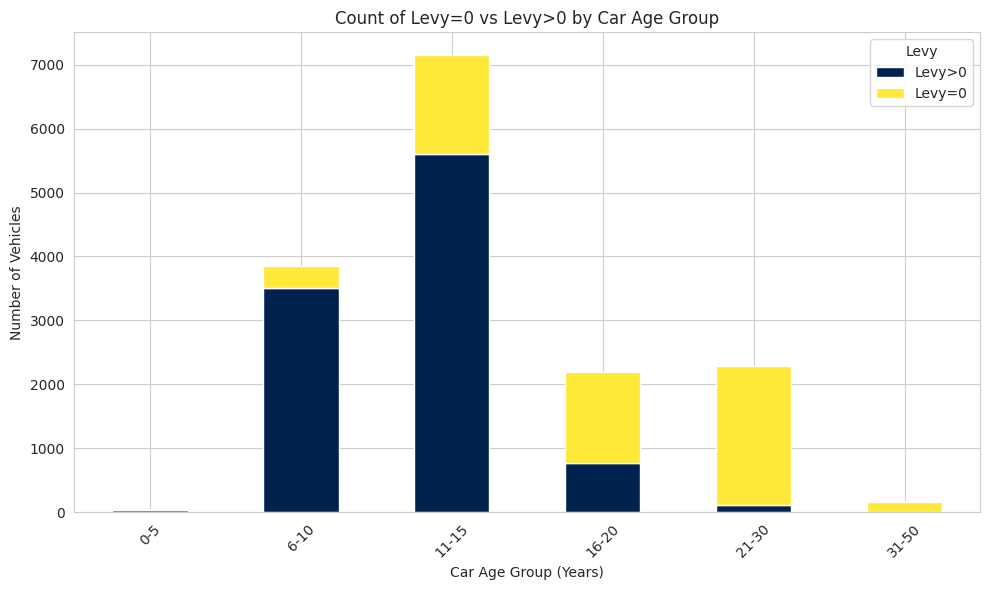

In [79]:
# Create binary indicator: 0 → levy=0, 1 → levy>0
df['levy_flag'] = df['levy'].apply(lambda x: 0 if x == 0 else 1)

# Group counts by car_age_group and levy_flag
levy_counts = df.groupby('car_age_group')['levy_flag'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
levy_counts.columns = ['Levy=0', 'Levy>0']

# Reorder columns
levy_counts = levy_counts[['Levy>0', 'Levy=0']]

# Plot stacked bar
levy_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),    
    colormap='cividis'
)

plt.xlabel("Car Age Group (Years)")
plt.ylabel("Number of Vehicles")
plt.title("Count of Levy=0 vs Levy>0 by Car Age Group")
plt.xticks(rotation=45)
plt.legend(title="Levy")
plt.tight_layout()
plt.show()


**💡 Observations**

- Newer cars (0–5 years) have a relatively low proportion of levy=0 (≈18.6%). very few newer cars in the dataset.

- Levy=0 is relatively low for newer cars (0–15 years) but rises sharply for older cars.

- 21–30 years old cars and 31–50 years old cars almost entirely have levy=0, which may reflect obsolete or missing levy data for very old cars.

> *🧠 Levy=0 is strongly correlated with car age.*

> *🧠 most likely represent missing values for old cars*

> *🧠 Need to analyze more in bivariate analyze section: especially vs `price`*

## Analyze `mileage`



In [80]:
# Summary
print(f"🔹 Summary of Mileage:")
print(df['mileage'].describe())

# Skewness & Kurtosis

print(f"\n🔹 Skewness:", df['mileage'].skew())
print(f"🔹 Kurtosis:", df['mileage'].kurt())

🔹 Summary of Mileage:
count    1.569700e+04
mean     1.702692e+06
std      5.076913e+07
min      0.000000e+00
25%      6.660300e+04
50%      1.210000e+05
75%      1.800000e+05
max      2.147484e+09
Name: mileage, dtype: float64

🔹 Skewness: 36.49133828011965
🔹 Kurtosis: 1415.1470456264244


💡 **Observations:**  
- The distribution of mileage is extremely right-skewed (skew ≈ 36.5) with very high kurtosis (≈1415), indicating the presence of extreme outliers.

- Median mileage (≈121,000 km) is much lower than the mean (≈1,702,000 km), reinforcing skewness.

- Minimum value is 0 km — likely representing brand new cars or missing data.

- Maximum value (≈2.1×10⁹ km) is clearly unrealistic and represents outliers.

In [81]:
# add as a skewd feature to handle later
skewed_features.append('mileage')

> *🧠 To better visualize the bulk of the dataset, we zoom into the 95th percentile, which removes the top 5% of extreme values from the plot (without actually deleting them from the dataset).*

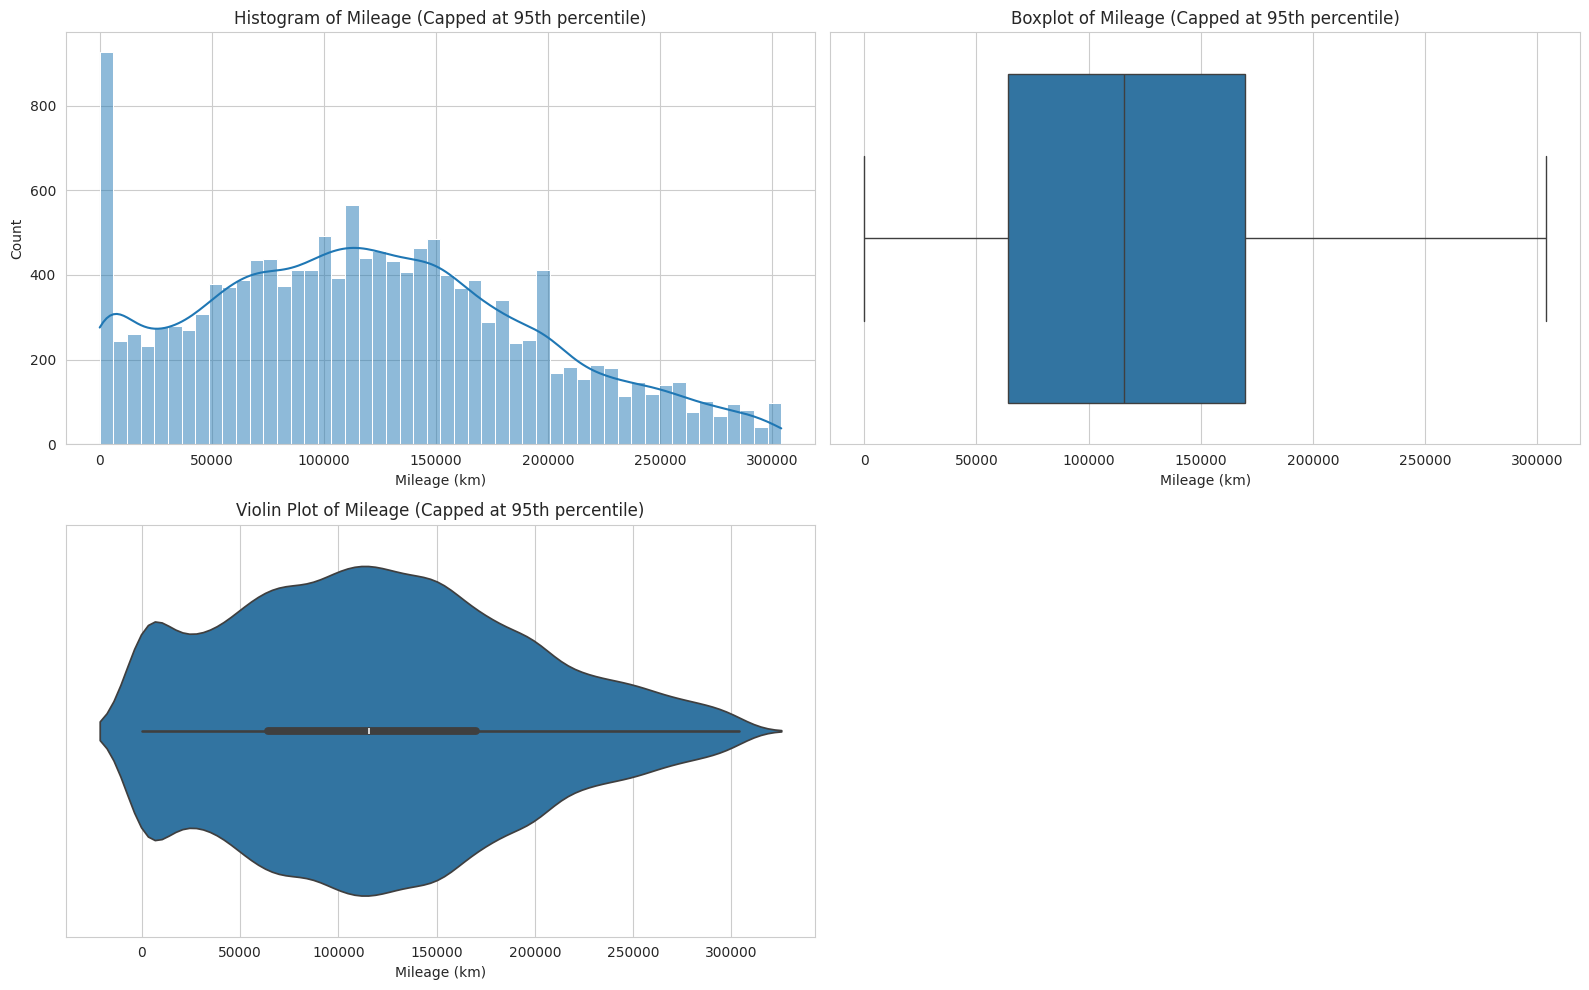

In [82]:
# Calculate 95th percentile
mileage_95 = df['mileage'].quantile(0.95)

# Filter mileage for plotting
mileage_capped = df[df['mileage'] <= mileage_95]['mileage']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram
sns.histplot(mileage_capped, bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Mileage (Capped at 95th percentile)")
axes[0, 0].set_xlabel("Mileage (km)")
axes[0, 0].set_ylabel("Count")

# Boxplot
sns.boxplot(x=mileage_capped, ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Mileage (Capped at 95th percentile)")
axes[0, 1].set_xlabel("Mileage (km)")

# Violin plot
sns.violinplot(x=mileage_capped, ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot of Mileage (Capped at 95th percentile)")
axes[1, 0].set_xlabel("Mileage (km)")

# Remove empty subplot (bottom-right)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


💡 **Observations:**  
- The histogram shows a right-skewed distribution with a large number of cars clustered at lower mileages.
- especially for `mileage == 0`  
- The violin plot shows the density of mileage values; there is a noticeable spike at very low mileage, likely representing newer or very lightly used cars.

> *🧠 Let's explore the `mileage == 0` case*

In [83]:
zero_count_percentage(df, 'mileage')

# Proportion of mileage = 0 by car age group
mileage_zero_by_age = df.groupby('car_age_group')['levy'].apply(lambda x: (x==0).mean())


# Convert to DataFrame for tabulate
mileage_table = mileage_zero_by_age.reset_index()
mileage_table.columns = ['Car Age Group', 'Proportion of mileage = 0']

# Print table
print(f"\n🔹 Proportion of mileage = 0 by car age group:")
print(tabulate(mileage_table, headers='keys', tablefmt='grid', showindex=False))

🔹 mileage = 0 → 605 rows (3.85%)

🔹 Proportion of mileage = 0 by car age group:
+-----------------+-----------------------------+
| Car Age Group   |   Proportion of mileage = 0 |
+=================+=============================+
| 0-5             |                   0.186047  |
+-----------------+-----------------------------+
| 6-10            |                   0.0910034 |
+-----------------+-----------------------------+
| 11-15           |                   0.215335  |
+-----------------+-----------------------------+
| 16-20           |                   0.648907  |
+-----------------+-----------------------------+
| 21-30           |                   0.950131  |
+-----------------+-----------------------------+
| 31-50           |                   0.97619   |
+-----------------+-----------------------------+


/tmp/ipykernel_224/1444929376.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_zero_by_age = df.groupby('car_age_group')['levy'].apply(lambda x: (x==0).mean())


💡 **Observations:**  
- Overall, 3.85% of cars have mileage = 0, indicating a small portion of cars with missing or unreported mileage.
> *🧠  since both old and new cars seems to have `0` mileages this might indicate missing values. especially for old vehicles*

/tmp/ipykernel_224/2432688934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


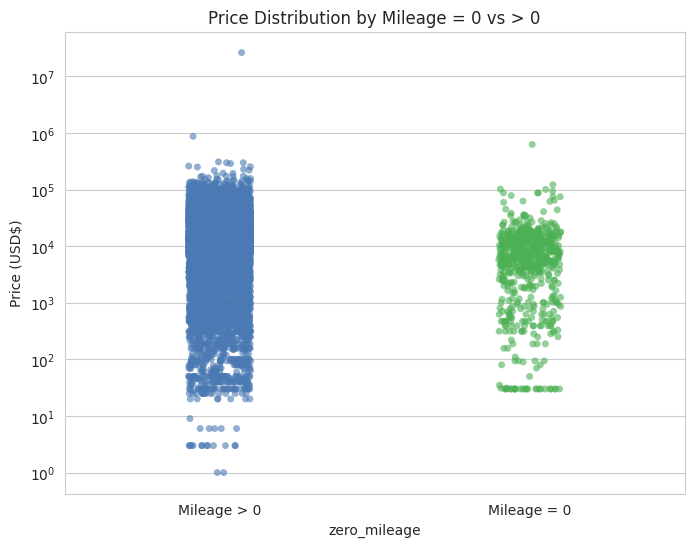

In [84]:
# Add zero mileage marker within the capped dataset
df_capped = df[df['mileage'] <= mileage_95].copy()
df_capped['zero_mileage'] = df_capped['mileage'] == 0

plt.figure(figsize=(8,6))
sns.stripplot(
    x=df_capped['zero_mileage'],
    y=df_capped['price'],
    jitter=True,  # spreads points horizontally for visibility
    alpha=0.6,
    palette=["#4A79B3","#4CB054"]
)
plt.yscale('log')
plt.xticks([0,1], ['Mileage > 0', 'Mileage = 0'])
plt.title("Price Distribution by Mileage = 0 vs > 0")
plt.ylabel("Price (USD$)")
plt.show()

💡 **Observations:**  
- cars with 0 mileage looks to be clustered more near the higher prices. indicating they might actually represent newer cars.

## Analyze `engine_volume`



In [85]:
# Summary
print(f"🔹 Summary of Engine Volume:")
print(df['engine_volume'].describe())

# Skewness & Kurtosis

print(f"\nSkewness:", df['engine_volume'].skew())
print(f"Kurtosis:", df['engine_volume'].kurt())

🔹 Summary of Engine Volume:
count    15697.000000
mean         2.212512
std          0.805126
min          0.000000
25%          1.700000
50%          2.000000
75%          2.500000
max         20.000000
Name: engine_volume, dtype: float64

Skewness: 2.2529346161726593
Kurtosis: 18.58973377341347


💡 **Observations:**  
- Most cars fall between 1.7 L and 2.5 L, with the median at 2.0 L, indicating compact to mid-sized engines dominate.

- The minimum recorded 0.0 L is likely erroneous or missing data, while the maximum of 20.0 L represents an extreme outlier.

The distribution is right-skewed (skewness = 2.25), with a sharp peak and heavy tails (kurtosis = 18.6), suggesting that while most cars cluster around smaller engines, a few very large engine volumes disproportionately affect the spread.

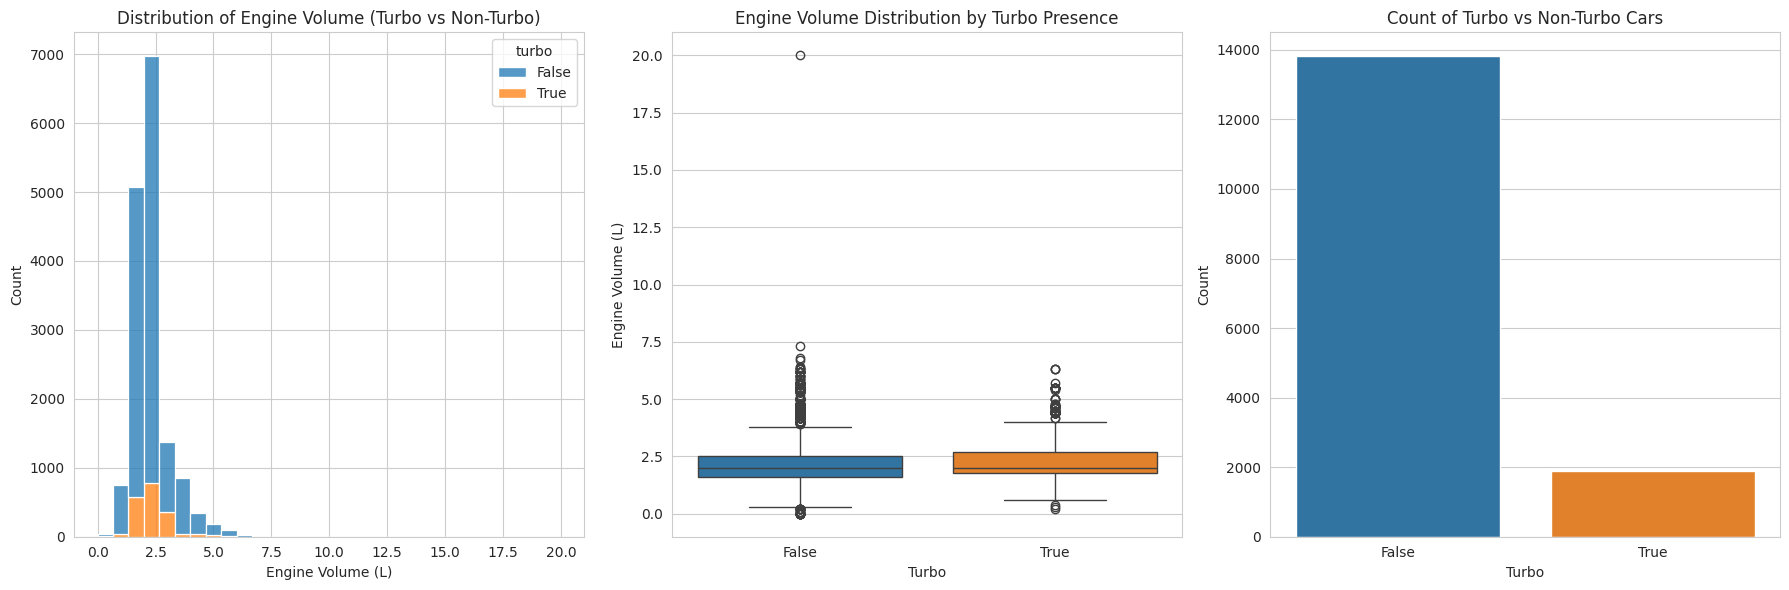

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))  # 1 row, 3 columns

# Histogram of Engine Volume (Turbo stacked on top)
sns.histplot(
    data=df, 
    hue='turbo',
    x='engine_volume', 
    bins=30, 
    multiple='stack',
    ax=axes[0]
)
axes[0].set_title("Distribution of Engine Volume (Turbo vs Non-Turbo)")
axes[0].set_xlabel("Engine Volume (L)")
axes[0].set_ylabel("Count")

# Boxplot of Engine Volume by Turbo
sns.boxplot(data=df, x='turbo', y='engine_volume', hue='turbo', legend=False, ax=axes[1])
axes[1].set_title("Engine Volume Distribution by Turbo Presence")
axes[1].set_xlabel("Turbo")
axes[1].set_ylabel("Engine Volume (L)")

# Countplot (Turbo vs Non-Turbo counts)
sns.countplot(data=df, x='turbo', hue='turbo', legend=False, ax=axes[2])
axes[2].set_title("Count of Turbo vs Non-Turbo Cars")
axes[2].set_xlabel("Turbo")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


💡 **Observations:**  
- The `turbo` shows highly imbalanced distribution in `engine volume`

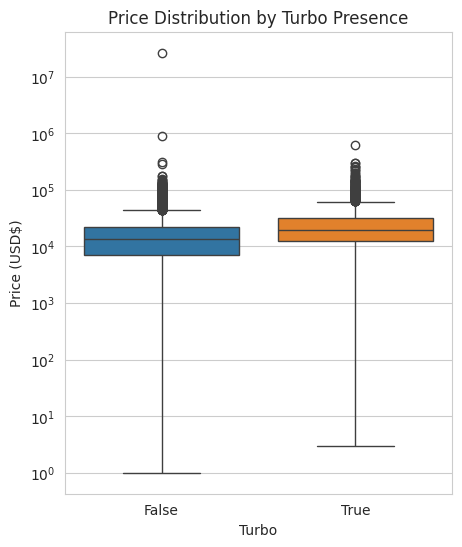

In [87]:
# comparing price vs turbo
plt.figure(figsize=(5,6))
sns.boxplot(data=df, x='turbo', y='price', hue='turbo', legend=False)
plt.yscale("log")
plt.title("Price Distribution by Turbo Presence")
plt.xlabel("Turbo")
plt.ylabel("Price (USD$)")
plt.show()


💡 **Observations:**  
- The cars that features engines with `turbo` tend to be more expensive. This match with real world market.

## Analyze `cylinders`

In [88]:
# cylinders
print(df['cylinders'].value_counts())

# Skewness & Kurtosis
print("\nSkewness:", df['cylinders'].skew())
print("Kurtosis:", df['cylinders'].kurt())

cylinders
4     12265
6      2427
8       600
5       165
3       107
2        42
12       38
1        36
10       12
7         4
9         1
Name: count, dtype: int64

Skewness: 2.2844331455524736
Kurtosis: 7.287691333713516


In [89]:
skewed_features.append('cylinders')

💡 **Observations:**  
- Extreme imbalance, 4-cylinder engines dominate (~12k out of ~16k).
- Odd or unusual values 7-, 9-, 10-, 12-cylinder engines are extremely uncommon. especialy 7 and 9 no car engines exists.
> *🧠 1-, 7- and 9- might be erroneous inputs*

In [90]:
def cylinder_group(c):
    if c < 4:
        return '<4'
    elif c == 4:
        return '4'
    else:
        return '>4'

df['cylinder_group'] = df['cylinders'].apply(cylinder_group)

# Prepare cylinder group counts
cylinder_counts = df['cylinder_group'].value_counts().reset_index()
cylinder_counts.columns = ['Cylinder Group', 'Count']

# Print table
print(tabulate(cylinder_counts, headers='keys', tablefmt='grid', showindex=False))

+------------------+---------+
| Cylinder Group   |   Count |
+==================+=========+
| 4                |   12265 |
+------------------+---------+
| >4               |    3247 |
+------------------+---------+
| <4               |     185 |
+------------------+---------+


/tmp/ipykernel_224/2293191654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylinder_group', y='price', data=df, order=['<4', '4', '>4'], palette=["#EFA570","#EBEB76", "#89E390"])


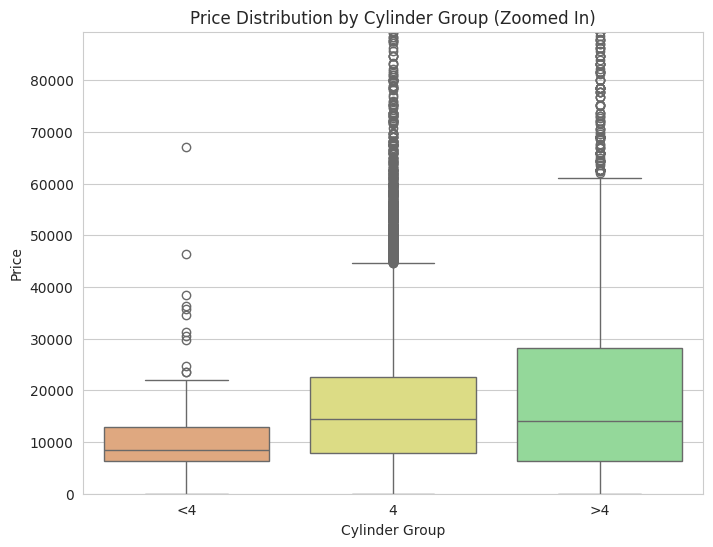

In [91]:
# Determine zoom limit (e.g., 99th percentile)
zoom_limit = df['price'].quantile(0.99)

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='cylinder_group', y='price', data=df, order=['<4', '4', '>4'], palette=["#EFA570","#EBEB76", "#89E390"])

# Zoom in
plt.ylim(0, zoom_limit)

plt.title('Price Distribution by Cylinder Group (Zoomed In)')
plt.ylabel('Price')
plt.xlabel('Cylinder Group')
plt.show()

💡 **Observations:**  
- Vehicles with more cylinders tend to have higher prices.

## Analyze `airbags`

In [92]:
print("Unique values:", df['airbags'].unique())

# Skewness & Kurtosis
print("\nSkewness:", df['airbags'].skew())
print("Kurtosis:", df['airbags'].kurt())

Unique values: [12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]

Skewness: 0.18064110596057084
Kurtosis: -1.1910548536708885


💡 **Observations:**  
-  the data is roughly symmetric.  
> *🧠 To make the visualization clearer, let's group the airbag counts.*

In [93]:
# define groupings
def airbags_group(n):
    if n == 0:
        return '0'
    elif 1 <= n <= 2:
        return '1-2'
    elif 3 <= n <= 4:
        return '3-4'
    elif 5 <= n <= 8:
        return '5-8'
    else:
        return '>8'

df['airbags_group'] = df['airbags'].apply(airbags_group)

# Check counts
print(df['airbags_group'].value_counts())


airbags_group
3-4    5141
>8     5019
5-8    3040
0      1378
1-2    1119
Name: count, dtype: int64


In [94]:
prop_df = (
    df.groupby('car_age_group')['airbags_group']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
      .reindex(columns=['0','1-2','3-4','5-8','>8']) 
)

/tmp/ipykernel_224/3200708380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('car_age_group')['airbags_group']


> *🧠 Let's find out the airbag distribution against price*

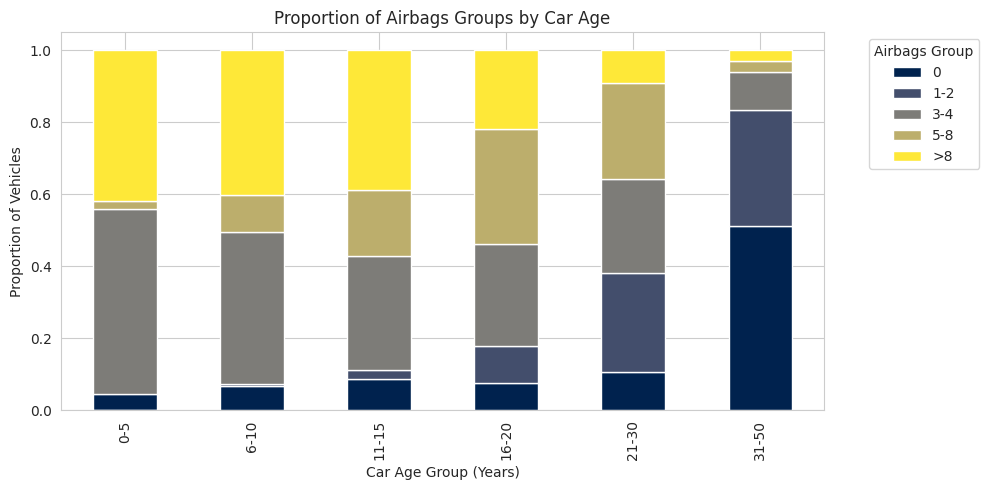

In [95]:
# plot airbag groups and car age group
prop_df.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10,5), 
    colormap='cividis'
)
plt.title("Proportion of Airbags Groups by Car Age")
plt.xlabel("Car Age Group (Years)")
plt.ylabel("Proportion of Vehicles")
plt.legend(title="Airbags Group", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

💡 **Observations:**  
- Newer cars tend to have more airbags, while older cars have fewer.
- Most vehicles with 0 airbags fall in the 31–50 years age group.



# Categorical Features
**Features to analyze: manufacturer, model, category, leather_interior, fuel_type, gear_box_type, drive_wheels, doors, wheel, color, turbo**

## Analyze `manufacturer`

### Count unique Manufacturer

In [96]:
# Number of unique manufacturers
unique_count = df['manufacturer'].nunique()
print(f"🔹 Number of unique manufacturers: {unique_count}")

# show all unique values
unique_values = df['manufacturer'].unique()
print(f"\n🔹 Unique manufacturers:", unique_values)


🔹 Number of unique manufacturers: 64

🔹 Unique manufacturers: ['lexus' 'chevrolet' 'honda' 'ford' 'hyundai' 'toyota' 'mercedes-benz'
 'opel' 'porsche' 'bmw' 'jeep' 'volkswagen' 'audi' 'renault' 'nissan'
 'subaru' 'daewoo' 'kia' 'mitsubishi' 'ssangyong' 'mazda' 'gmc' 'fiat'
 'infiniti' 'alfa romeo' 'suzuki' 'acura' 'lincoln' 'vaz' 'citroen'
 'land rover' 'mini' 'dodge' 'chrysler' 'jaguar' 'isuzu' 'skoda'
 'daihatsu' 'buick' 'tesla' 'cadillac' 'gaz' 'peugeot' 'bentley' 'volvo'
 'სხვა' 'haval' 'hummer' 'scion' 'uaz' 'mercury' 'zaz' 'rover' 'seat'
 'lancia' 'maserati' 'ferrari' 'saab' 'lamborghini' 'moskvich' 'pontiac'
 'saturn' 'aston martin' 'greatwall']


### Check Rare Categories



In [97]:
# Count manufacturers and calculate proportion
manufacturer_counts = df['manufacturer'].value_counts().reset_index()
manufacturer_counts.columns = ['Manufacturer', 'Count']
manufacturer_counts['Proportion (%)'] = (manufacturer_counts['Count'] / len(df) * 100).round(2)

# Identify rare manufacturers (<1%)
rare_threshold = 1  # percent
rare_manufacturers = manufacturer_counts[manufacturer_counts['Proportion (%)'] < rare_threshold]

# Print summary
print(f"\n🔹 Count of Rare Manufacturers: {rare_manufacturers.shape[0]}") 
print("\n🔹 Rare Manufacturers (<1% of dataset):") 
print(rare_manufacturers.head(4)) 
print(f"...\n...") 
print(rare_manufacturers.tail(4)) 




🔹 Count of Rare Manufacturers: 48

🔹 Rare Manufacturers (<1% of dataset):
   Manufacturer  Count  Proportion (%)
16        mazda    141            0.90
17         jeep    138            0.88
18        dodge     89            0.57
19         fiat     76            0.48
...
...
    Manufacturer  Count  Proportion (%)
60       pontiac      1            0.01
61        saturn      1            0.01
62  aston martin      1            0.01
63     greatwall      1            0.01


💡 **Observations:**  
- Out of 64 unique manufacturers, 48 have less than 1% representation → highly imbalanced.
- High `cardinality` in the manufacturer column.


### Visualize Manufacturers

#### *Pareto chart*

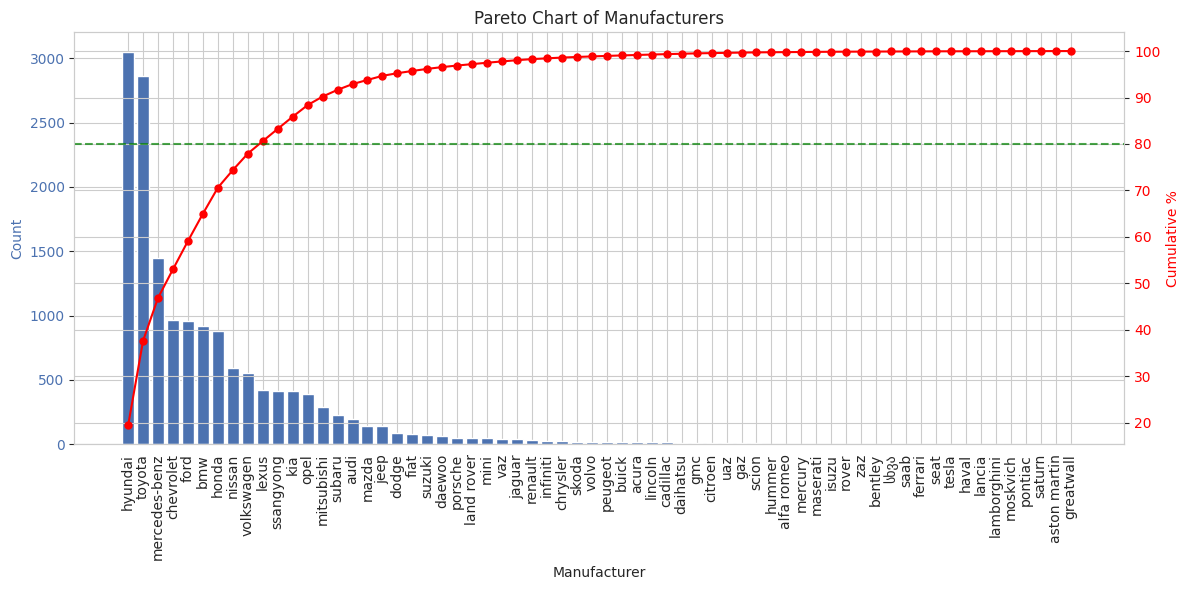

In [98]:
# Manufacturer counts sorted descending
manufacturer_counts = df['manufacturer'].value_counts()

# Cumulative percentage
cumulative_pct = manufacturer_counts.cumsum() / manufacturer_counts.sum() * 100

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for counts
ax1.bar(manufacturer_counts.index, manufacturer_counts.values, color="#4C72B0")
ax1.set_xlabel("Manufacturer")
ax1.set_ylabel("Count", color="#4C72B0")
ax1.tick_params(axis='y', labelcolor="#4C72B0")
ax1.tick_params(axis='x', rotation=90)

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(manufacturer_counts.index, cumulative_pct, color="red", marker="o", ms=5)
ax2.set_ylabel("Cumulative %", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.axhline(80, color='green', linestyle='--', alpha=0.7)  # 80% line

plt.title("Pareto Chart of Manufacturers")
plt.tight_layout()
plt.show()

💡 **Observations:**  
- The Pareto principle is clearly visible: a few “vital” brands account for most of the data, while many minor brands contribute little individually.
- A small number of manufacturers (~10 out of 64) dominate the dataset, covering roughly 80% of all vehicles.
> *🧠 For feature engineering, We will consider encoding top manufacturers individually and all rare brands as “Other” for clean, robust modeling.*

## Analyze `model`

### Count unique Models

In [99]:
# Number of unique models
unique_count = df['model'].nunique()
print(f"🔹 Number of unique models: {unique_count}")

# show all unique values
unique_values = df['model'].unique()
print(f"\n🔹 Unique models:", unique_values)


🔹 Number of unique models: 1501

🔹 Unique models: ['rx 450' 'equinox' 'fit' ... 'e 230 124' 'rx 450 f sport' 'prius c aqua']


### Check Rare Categories



In [100]:
# Count model and calculate proportion
model_counts = df['model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']
model_counts['Proportion (%)'] = (model_counts['Count'] / len(df) * 100).round(2)

# Identify rare manufacturers (<1%)
rare_threshold = 1  # percent
rare_models = model_counts[model_counts['Proportion (%)'] < rare_threshold]

# Print summary
print(f"\n🔹 Count of Rare Models: {rare_models.shape[0]}") 
print("\n🔹 Rare Models (<1% of dataset):") 
print(rare_models.head(4)) 
print(f"...\n...") 
print(rare_models.tail(4)) 




🔹 Count of Rare Models: 1483

🔹 Rare Models (<1% of dataset):
      Model  Count  Proportion (%)
18   rexton    151            0.96
19    e 350    150            0.96
20    astra    148            0.94
21  captiva    135            0.86
...
...
               Model  Count  Proportion (%)
1497       focus sel      1            0.01
1498   xc90 2.5turbo      1            0.01
1499  prius v hibrid      1            0.01
1500       ridgeline      1            0.01


💡 **Observations:**  
- Out of 1501 unique models, 1483 have less than 1% representation → highly imbalanced.
- Very High `cardinality` in the manufacturer column.


### Visualize Models

#### *Pareto chart*

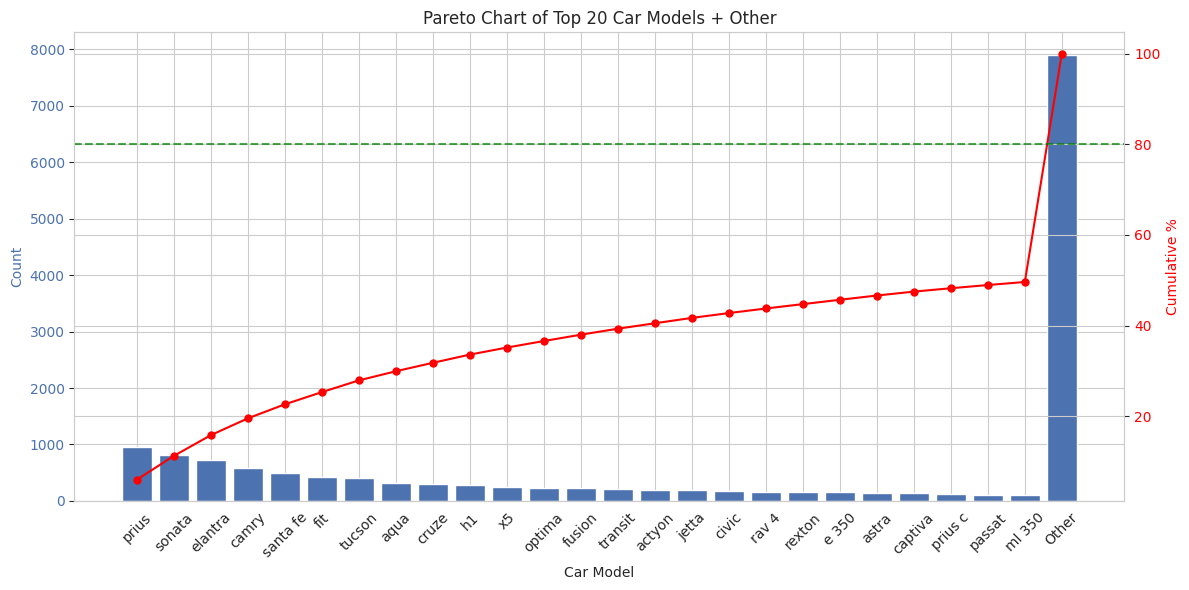

In [101]:
# Count models sorted descending
model_counts = df['model'].value_counts()

# Keep only top N models (e.g., top 20) and group the rest as 'Other'
top_n = 25
top_models = model_counts.head(top_n)
other_count = model_counts.iloc[top_n:].sum()

# Combine top models + 'Other' using concat
model_counts_top = pd.concat([top_models, pd.Series({'Other': other_count})])

#  Cumulative percentage
cumulative_pct_model = model_counts_top.cumsum() / model_counts_top.sum() * 100

#  Plot Pareto chart
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for counts
ax1.bar(model_counts_top.index, model_counts_top.values, color="#4C72B0")
ax1.set_xlabel("Car Model")
ax1.set_ylabel("Count", color="#4C72B0")
ax1.tick_params(axis='y', labelcolor="#4C72B0")
ax1.tick_params(axis='x', rotation=45)

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(model_counts_top.index, cumulative_pct_model, color="red", marker="o", ms=5)
ax2.set_ylabel("Cumulative %", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.axhline(80, color='green', linestyle='--', alpha=0.7)  # 80% line

plt.title("Pareto Chart of Top 20 Car Models + Other")
plt.tight_layout()
plt.show()


**💡 Observations**
- The top car model alone accounts for 10% of all vehicles.
- The top 25 car models collectively cover 50% of the dataset.
- The remaining 1,476 models (out of 1,501) are rare and individually contribute very little → grouped as “Other”.
- This confirms very high cardinality in the model feature.

> *🧠 For modeling and feature engineering, We will consider keeping the top N (~25) models individually and grouping all rare models as “Other” to reduce sparsity and improve model robustness.*

## Analyze `category`

### Count unique Category

In [102]:
# Number of unique Category
unique_count = df['category'].nunique()
print(f"🔹 Number of unique Category: {unique_count}")

# show all unique values
unique_values = df['category'].unique()
print(f"\n🔹 Unique Category:", unique_values)


🔹 Number of unique Category: 11

🔹 Unique Category: ['jeep' 'hatchback' 'sedan' 'microbus' 'goods wagon' 'universal' 'coupe'
 'minivan' 'cabriolet' 'pickup' 'limousine']


### Value counts for each category

In [103]:
# Count categories
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Calculate proportion
category_counts['Proportion (%)'] = (category_counts['Count'] / len(df) * 100).round(2)

# Print title
print("🔹 Distribution of Categories\n")

# Print minimal table with percentages
print(tabulate(category_counts, headers='keys', tablefmt='plain', showindex=False))


🔹 Distribution of Categories

Category       Count    Proportion (%)
sedan           7002             44.61
jeep            4219             26.88
hatchback       2545             16.21
minivan          534              3.4
coupe            474              3.02
universal        311              1.98
microbus         295              1.88
goods wagon      226              1.44
pickup            51              0.32
cabriolet         34              0.22
limousine          6              0.04


**💡 Observations**
- Sedans dominate the dataset, accounting for 44.6% of all vehicles.
- Several categories are very rare (limousine 0.04%, cabriolet 0.22%, pickup 0.32%).

### Visualize Manufacturers

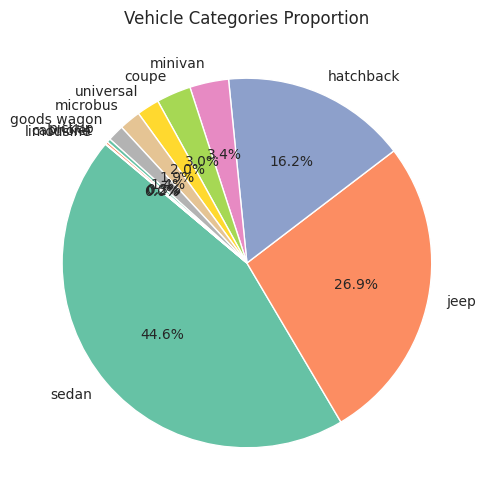

In [104]:
plt.figure(figsize=(6,6))
plt.pie(category_counts['Count'], labels=category_counts['Category'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(category_counts)))
plt.title("Vehicle Categories Proportion")
plt.show()


> 🧠 For feature engineering, We will consider keeping major categories individually and grouping rare categories as “Other” to reduce sparsity and improve model performance.

## Analyze `leather_interior`

In [105]:
#  Count leather interior
leather_counts = df['leather_interior'].value_counts().reset_index()
leather_counts.columns = ['Leather Interior', 'Count']
leather_counts['Proportion (%)'] = (leather_counts['Count'] / len(df) * 100).round(2)

# Print table
print("🔹 Leather Interior Distribution")
print(tabulate(leather_counts, headers='keys', tablefmt='plain', showindex=False))

🔹 Leather Interior Distribution
Leather Interior      Count    Proportion (%)
yes                   10547             67.19
no                     5150             32.81


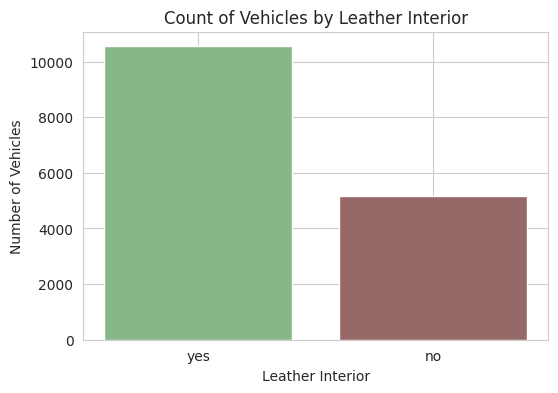

In [106]:
#  Bar chart
plt.figure(figsize=(6,4))
plt.bar(leather_counts['Leather Interior'], leather_counts['Count'], color=["#87b786", "#966868"])
plt.title("Count of Vehicles by Leather Interior")
plt.xlabel("Leather Interior")
plt.ylabel("Number of Vehicles")
plt.show()

**💡 Observations**
- 67% of vehicles have leather interiors, while 33% do not.
- Leather interiors are the majority, suggesting this dataset has a bias toward premium or higher-spec vehicles.
> *🧠 This binary feature may correlate with price, category, or manufacturer we will analyze in Bivariate*

## Analyze `fuel_type`

### Count unique values

In [107]:
# Number of unique types
unique_count = df['fuel_type'].nunique()
print(f"🔹 Number of unique fuel types: {unique_count}")

# show all unique values
unique_values = df['fuel_type'].unique()
print(f"\n🔹 Unique fuel types:", unique_values)


🔹 Number of unique fuel types: 7

🔹 Unique fuel types: ['hybrid' 'petrol' 'diesel' 'cng' 'plug-in hybrid' 'lpg' 'hydrogen']


### Value counts for each type

In [108]:
# Count Furl Types
fuel_type_counts = df['fuel_type'].value_counts().reset_index()
fuel_type_counts.columns = ['Fuel Types', 'Count']

# Calculate proportion
fuel_type_counts['Proportion (%)'] = (fuel_type_counts['Count'] / len(df) * 100).round(2)

# Print title
print("🔹 Distribution of Furl Types\n")

# Print minimal table with percentages
print(tabulate(fuel_type_counts, headers='keys', tablefmt='plain', showindex=False))


🔹 Distribution of Furl Types

Fuel Types        Count    Proportion (%)
petrol             8801             56.07
diesel             3206             20.42
hybrid             2424             15.44
lpg                 714              4.55
cng                 466              2.97
plug-in hybrid       85              0.54
hydrogen              1              0.01


/tmp/ipykernel_224/2102259244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_type_counts, x='Fuel Types', y='Count', palette='Set2')


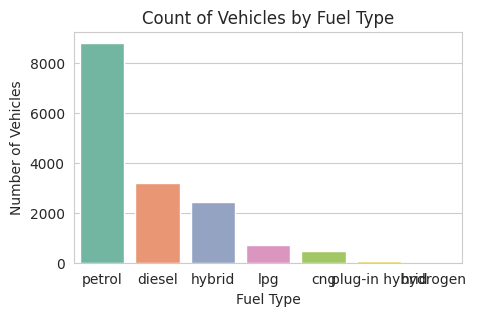

In [109]:
plt.figure(figsize=(5,3))
sns.barplot(data=fuel_type_counts, x='Fuel Types', y='Count', palette='Set2')
plt.title("Count of Vehicles by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Vehicles")
plt.show()

**💡 Observations**
- Most of the dataset is dominated by conventional fuels (petrol, diesel), while alternative fuels are uncommon.

> *🧠* 
> - *Group rare fuel types: Combine LPG, CNG, Hydrogen, into a single category like `Liq_gas` vs `*Alternative`.*
>  - *Consider creating a “fuel category” feature: `Is_Conventional` vs `Is_Alternative`
>  - *Plot price vs fuel type to see if alternative fuels are generally more expensive: in Bivariate analyze.*


## Analyze `gear_box_type`

### Count unique Types

In [110]:
# Number of unique Gear box type
unique_count = df['gear_box_type'].nunique()
print(f"🔹 Number of unique Gear box types: {unique_count}")

# show all unique values
unique_values = df['gear_box_type'].unique()
print(f"\n🔹 Unique Gear box types:", unique_values)


🔹 Number of unique Gear box types: 4

🔹 Unique Gear box types: ['automatic' 'tiptronic' 'variator' 'manual']


### Value counts for each Gear box type

In [111]:
# Count Gear box types
gear_counts = df['gear_box_type'].value_counts().reset_index()
gear_counts.columns = ['Gear box type', 'Count']

# Calculate proportion
gear_counts['Proportion (%)'] = (gear_counts['Count'] / len(df) * 100).round(2)

# Print title
print("🔹 Distribution of Gear box types\n")

# Print minimal table with percentages
print(tabulate(gear_counts, headers='keys', tablefmt='plain', showindex=False))


🔹 Distribution of Gear box types

Gear box type      Count    Proportion (%)
automatic          10079             64.21
tiptronic           3063             19.51
manual              1823             11.61
variator             732              4.66


/tmp/ipykernel_224/2838417989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gear_counts, x='Gear box type', y='Count', palette='Set2')


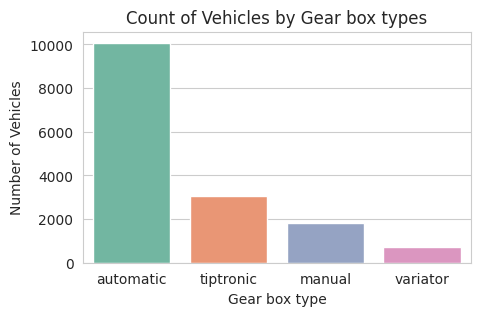

In [112]:
plt.figure(figsize=(5,3))
sns.barplot(data=gear_counts, x='Gear box type', y='Count', palette='Set2')
plt.title("Count of Vehicles by Gear box types")
plt.xlabel("Gear box type")
plt.ylabel("Number of Vehicles")
plt.show()

💡 **Observations:**  
- Most vehicles are equipped with automatic or semi-automatic transmissions, while manual and variator types are minority categories.

## Analyze `drive_wheels`

### Count unique values

In [113]:
# Number of unique types
unique_count = df['drive_wheels'].nunique()
print(f"🔹 Number of unique drive type: {unique_count}")

# show all unique values
unique_values = df['drive_wheels'].unique()
print(f"\n🔹 Unique drive type:", unique_values)


🔹 Number of unique drive type: 3

🔹 Unique drive type: ['4x4' 'front' 'rear']


### Value counts for each type

In [114]:
# Count drive types
drive_counts = df['drive_wheels'].value_counts().reset_index()
drive_counts.columns = ['drive type', 'Count']

# Calculate proportion
drive_counts['Proportion (%)'] = (drive_counts['Count'] / len(df) * 100).round(2)

# Print title
print("🔹 Distribution of Drive types\n")

# Print minimal table with percentages
print(tabulate(drive_counts, headers='keys', tablefmt='plain', showindex=False))


🔹 Distribution of Drive types

drive type      Count    Proportion (%)
front           10983             69.97
4x4              2761             17.59
rear             1953             12.44


/tmp/ipykernel_224/2732741171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drive_counts, x='drive type', y='Count', palette=["#81F08A","#CF7AF7", "#6A8EF9"])


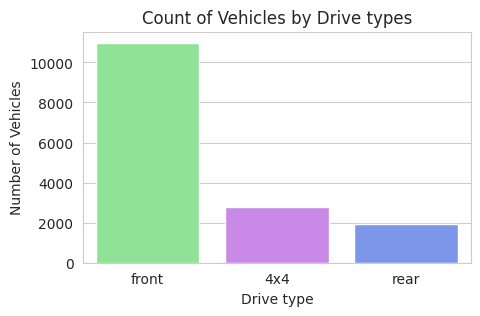

In [115]:
plt.figure(figsize=(5,3))
sns.barplot(data=drive_counts, x='drive type', y='Count', palette=["#81F08A","#CF7AF7", "#6A8EF9"])
plt.title("Count of Vehicles by Drive types")
plt.xlabel("Drive type")
plt.ylabel("Number of Vehicles")
plt.show()


**💡 Observations**
- Front-wheel drive dominates – Nearly 70% of cars are front-wheel drive, which is expected since it’s the most common for compact and mid-range vehicles.
- The dataset is heavily skewed towards front-wheel drive, while rear-wheel drive and 4x4 indicate more specialized or premium vehicle segments.

> *🧠 Check price correlation*
>

## Analyze `doors`

### Count unique values

In [116]:
# Number of unique door count types
unique_count = df['doors'].nunique()
print(f"🔹 Number of unique door count types: {unique_count}")

# show all unique values
unique_values = df['doors'].unique()
print(f"\n🔹 Unique door count types:", unique_values)


🔹 Number of unique door count types: 3

🔹 Unique door count types: ['04-may' '02-mar' '>5']


🚨 **Data Quality Concern**: The labels "04-may" and "02-mar" look like they’ve been incorrectly parsed (perhaps month abbreviations).
> 💡 **Observations:**  
> - `"04-may"` → likely means 4–5 doors (data quality / encoding issue).
> - `"02-mar"` → likely means 2–3 doors.
> - `">5"` → vehicles with more than 5 doors (e.g., minivans, microbuses).

> *🧠 Map them into cleaner categories:`"2-3"`, `"4-5"`, `">5"*`*

In [117]:
door_counts = df['doors'].value_counts().reset_index()
door_counts.columns = ['doors', 'Count']

# Calculate proportion
door_counts['Proportion (%)'] = (door_counts['Count'] / len(df) * 100).round(2)

# Print title
print("🔹 Distribution of Door counts")

# Print minimal table with percentages
print(tabulate(door_counts, headers='keys', tablefmt='plain', showindex=False))


🔹 Distribution of Door counts
doors      Count    Proportion (%)
04-may     14835             94.51
02-mar       738              4.7
>5           124              0.79


/tmp/ipykernel_224/428628830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=door_counts, x='doors', y='Count', palette='Set2')


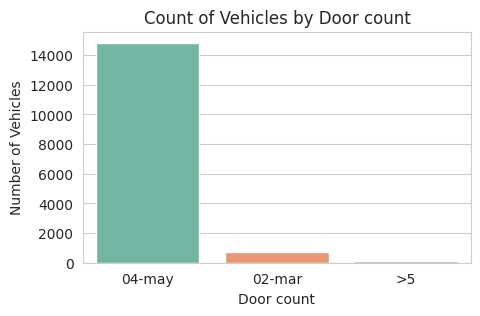

In [118]:
plt.figure(figsize=(5,3))
sns.barplot(data=door_counts, x='doors', y='Count', palette='Set2')
plt.title("Count of Vehicles by Door count")
plt.xlabel("Door count")
plt.ylabel("Number of Vehicles")
plt.show()

**💡 Observations:**
- `04 may` category of doors dominates 94.51% of the cars. Since most standard sedans, hatchbacks, or SUVs have 4 to 5 doors this category being `4-5` makes sense.

 **🧠 Clean the labels to: "2-3", "4-5", and ">5" for clarity in Feature Engineering.**
> - *Door count has very low variability. nearly all cars fall into the 4–5 door segment, so it won’t provide much predictive power unless we're specifically distinguishing between sports cars (2–3 doors) and everything else.*  
>  - *check whether 2–3 door cars have a distinct premium compared to 4-5 dppr cars: in Bivariate analyze*

## Analyze `wheel`

### Count unique steering wheel positions

In [119]:
# Number of unique types
unique_count = df['wheel'].nunique()
print(f"🔹 Number of unique steering wheel positions: {unique_count}")

# show all unique values
unique_values = df['wheel'].unique()
print(f"\n🔹 Unique steering wheel position:", unique_values)


🔹 Number of unique steering wheel positions: 2

🔹 Unique steering wheel position: ['left wheel' 'right-hand drive']


### Value counts for each steering wheel positions


In [120]:
# Count steering wheel positions
steering_counts = df['wheel'].value_counts().reset_index()
steering_counts.columns = ['wheel type', 'Count']

# Calculate proportion
steering_counts['Proportion (%)'] = (steering_counts['Count'] / len(df) * 100).round(2)

# Print title
print("🔹 Distribution of steering wheel positions\n")

# Print minimal table with percentages
print(tabulate(steering_counts, headers='keys', tablefmt='plain', showindex=False))


🔹 Distribution of steering wheel positions

wheel type          Count    Proportion (%)
left wheel          14266             90.88
right-hand drive     1431              9.12


💡 **Observations:**  
- This feature is highly imbalanced, but it may still carry predictive power: Right-hand drive vehicles could have lower demand / resale value in left-hand drive countries.
- Left wheel dominates → ~91% of the dataset, which matches the standard for most countries.

### Visualization Price vs Wheel Position

/tmp/ipykernel_224/142225258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wheel', y='price', data=df, palette=["#4CB054","#E1531B"])


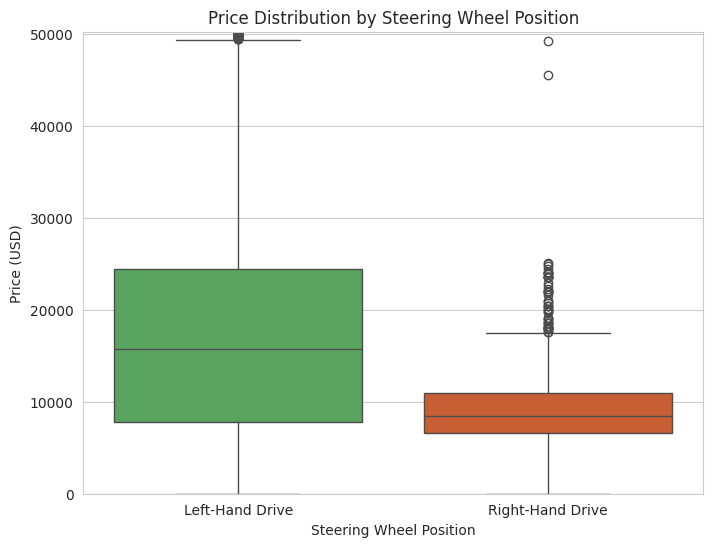

In [121]:
plt.figure(figsize=(8,6))
sns.boxplot(x='wheel', y='price', data=df, palette=["#4CB054","#E1531B"])
plt.title("Price Distribution by Steering Wheel Position")
plt.xlabel("Steering Wheel Position")
plt.ylabel("Price (USD)")
plt.xticks([0,1], ['Left-Hand Drive', 'Right-Hand Drive'])
plt.ylim(0, df['price'].quantile(0.95))  # cap at 95th percentile for clarity
plt.show()


💡 **Observations:**  
- Left-hand drive (LHD) vehicles have a higher price range than right-hand drive (RHD).
> *🧠 In LHD standard countries RHD cars seems to be devalued.*

⚠️ **But for Sri Lanka the standard is Right wheel Steering**

> *🧠 Feature Engineering Idea: Create a binary feature like is_standard_wheel → 1 if matches our country’s system (RHD), 0 if not.*

## Analyze `color`

### Count unique Colors

In [122]:
# Number of unique colors
unique_count = df['color'].nunique()
print(f"🔹 Number of unique colors: {unique_count}")

# show all unique colors
unique_values = df['color'].unique()
print(f"\n🔹 Unique colors:", unique_values)


🔹 Number of unique colors: 16

🔹 Unique colors: ['silver' 'black' 'white' 'grey' 'blue' 'green' 'red' 'sky blue' 'orange'
 'yellow' 'brown' 'golden' 'beige' 'carnelian red' 'purple' 'pink']


### Value counts for each color

In [123]:
# Count Colors
colors_counts = df['color'].value_counts().reset_index()
colors_counts.columns = ['Colors', 'Count']

# Calculate proportion
colors_counts['Proportion (%)'] = (colors_counts['Count'] / len(df) * 100).round(2)

# Print title
print("🔹 Distribution of Colors\n")

# Print minimal table with percentages
print(tabulate(colors_counts, headers='keys', tablefmt='plain', showindex=False))


🔹 Distribution of Colors

Colors           Count    Proportion (%)
black             3832             24.41
white             3605             22.97
silver            3146             20.04
grey              1918             12.22
blue              1245              7.93
red                564              3.59
green              286              1.82
orange             204              1.3
carnelian red      177              1.13
brown              171              1.09
golden             142              0.9
beige              132              0.84
sky blue           119              0.76
yellow              92              0.59
purple              39              0.25
pink                25              0.16


💡 **Observations:**  
- Most common colors: Black (24.4%), White (23%), and Silver (20%) dominate → ~68% of the dataset.
- Moderately common: Grey (12.2%), Blue (7.9%), Red (3.6%).
- Ither rare colors: each <2%.

- High imbalance in color distribution → a few dominant colors and many rare ones.

- This is typical in car datasets where standard colors dominate.
> *🧠 Feature Engineering idea: Group rare colors*
>
>- Combine all colors <1–2% into a category like "Other" to reduce cardinality.

## Analyze `turbo`

### Count of cars that have turbo 1and not

🔹 Distribution of Turbo Feature
Turbo      Count    Proportion (%)
False      13814                88
True        1883                12


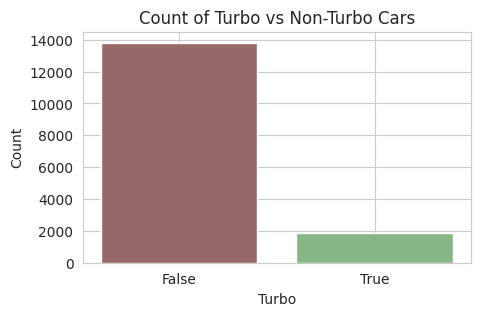

In [124]:
# Count turbo values
turbo_counts = df['turbo'].value_counts().reset_index()
turbo_counts.columns = ['Turbo', 'Count']

# Calculate proportion
turbo_counts['Proportion (%)'] = (turbo_counts['Count'] / len(df) * 100).round(2)

# Print table
print("🔹 Distribution of Turbo Feature")
print(tabulate(turbo_counts, headers='keys', tablefmt='plain', showindex=False))

# Bar chart
plt.figure(figsize=(5,3))
colors = ["#966868", "#87b786"] 
plt.bar(turbo_counts['Turbo'].astype(str), turbo_counts['Count'], color=colors)
plt.xlabel("Turbo")
plt.ylabel("Count")
plt.title("Count of Turbo vs Non-Turbo Cars")
plt.show()

💡 **Observations:**  
- Highly imbalanced: Only 12% of cars have a turbo, while 88% are non-turbo.

> *🧠 Price Expectation for turbo*

### visualize the price distributions for turbo

/tmp/ipykernel_224/2355625161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='turbo', y='price', data=df, palette=["#DD8452", "#4C72B0"])


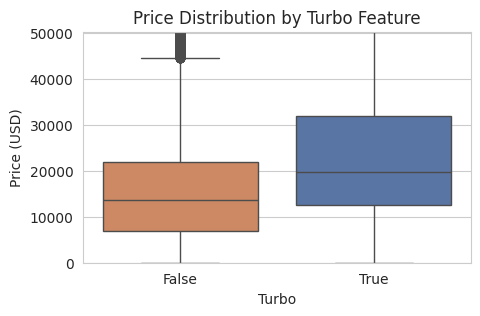

🔹 Price Summary by Turbo Feature
         count          mean      50%            std  min         max
turbo                                                                
False  13814.0  19178.647749  13543.5  224400.637744  1.0  26307500.0
True    1883.0  28396.835900  19726.0   32032.694953  3.0    627220.0


In [125]:
# Boxplot (with price capped at 95th percentile for clarity)
price_cap = df['price'].quantile(0.95)

plt.figure(figsize=(5,3))
sns.boxplot(x='turbo', y='price', data=df, palette=["#DD8452", "#4C72B0"])
plt.ylim(0, price_cap)
plt.xlabel("Turbo")
plt.ylabel("Price (USD)")
plt.title("Price Distribution by Turbo Feature")
plt.show()

# 2️⃣ Summary statistics
turbo_price_summary = df.groupby('turbo')['price'].describe()[['count','mean','50%','std','min','max']]
print("🔹 Price Summary by Turbo Feature")
print(turbo_price_summary)

💡 **Observations:**  
> Price Comparison:
 - Non-turbo: median ≈ 13,543 USD, mean ≈ 19,179 USD
 - Turbo: median ≈ 19,726 USD, mean ≈ 28,397 USD → **turbo cars are significantly more expensive.**

> *🧠 Feature Engineering Idea: Binary Feature `turbo` can be used as-is in models.*

# Bivariate Analysis 
**Relationships with Target**

## `levy` vs `price`

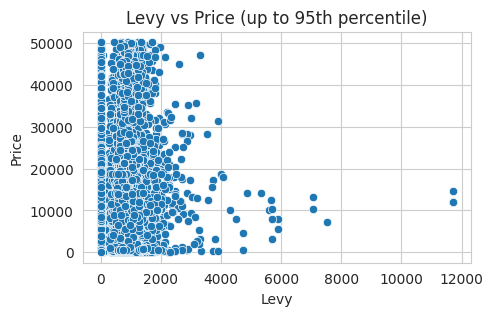

In [126]:
price_95 = df['price'].quantile(0.95)

# Filter the dataset
df_filtered = df[df['price'] <= price_95]

# Plot
plt.figure(figsize=(5,3))
sns.scatterplot(x='levy', y='price', data=df_filtered)
plt.title('Levy vs Price (up to 95th percentile)')
plt.xlabel('Levy')
plt.ylabel('Price')
plt.show()


In [127]:
corr = df[['levy', 'price']].corr()
print("Pearson correlation between levy and price:\n", corr)


Pearson correlation between levy and price:
            levy     price
levy   1.000000  0.000453
price  0.000453  1.000000


💡 **Observations:**  
- The Pearson correlation between levy and price is effectively zero (0.00045), indicating that `levy` does not have a linear relationship with car `price`.`
- Changes in `levy` do not correspond to predictable changes in `price`

> *🧠 `levy` may not be a useful predictor of `price` in our regression model.*.

## `mileage` vs `price`

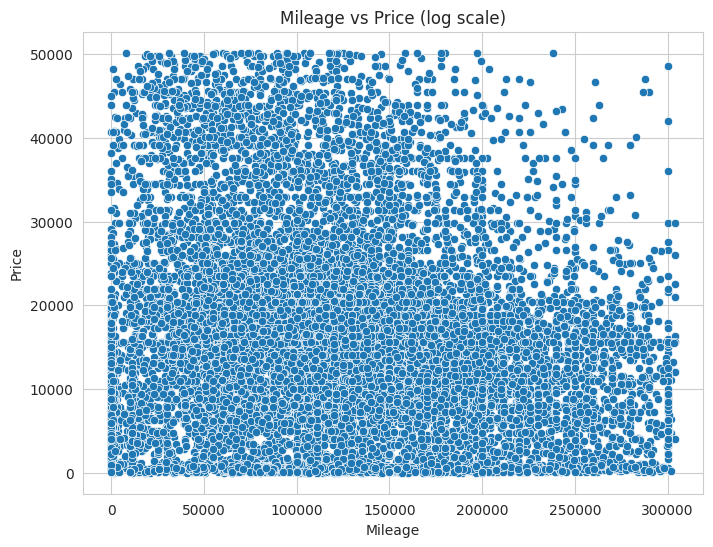

In [128]:
# 95th percentile of price and mileage
price_95 = df['price'].quantile(0.95)
mileage_95 = df['mileage'].quantile(0.95)

# Filter dataset for both conditions
df_filtered = df[(df['price'] <= price_95) & (df['mileage'] <= mileage_95)]

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='mileage', y='price', data=df_filtered)
plt.title('Mileage vs Price (log scale)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()



In [129]:
corr = df_filtered[['mileage', 'price']].corr()
print("Pearson correlation between mileage and price:\n", corr)


Pearson correlation between mileage and price:
           mileage     price
mileage  1.000000 -0.125331
price   -0.125331  1.000000


💡 **Observations:**  
- There is a slight negative relationship: as mileage increases, price tends to decrease a little.
- However, the correlation is weak, so mileage alone does not strongly explain price variation.

> *🧠 Implications for Feature Engineering:*
>
> - Keep mileage as a feature. it contributes to price and concider creating new features with other features (e.g., car_age × mileage) to capture depreciation effects.

## `Engine Volume` vs `Price`

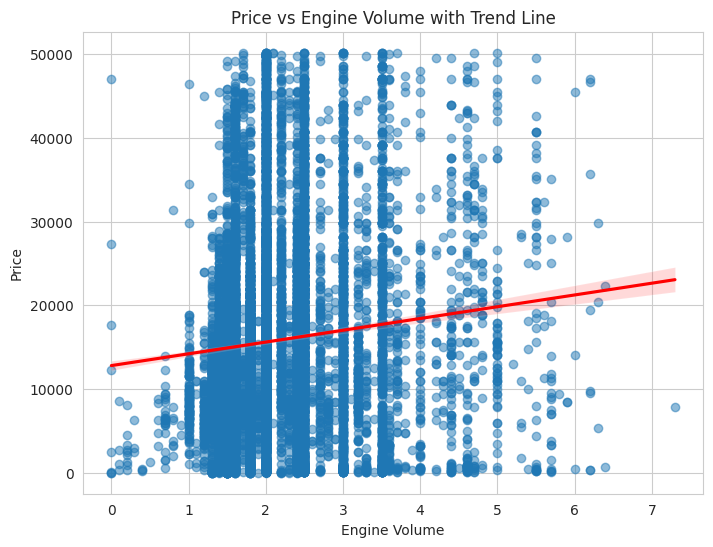

In [130]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='engine_volume', 
    y='price', 
    data=df_filtered,
    scatter_kws={'alpha':0.5},  # make points semi-transparent
    line_kws={'color':'red'}
)
plt.title('Price vs Engine Volume with Trend Line')
plt.xlabel('Engine Volume')
plt.ylabel('Price')
plt.show()

In [131]:
corr = df_filtered[['engine_volume', 'price']].corr()
print("Pearson correlation between engine_volume and price:\n", corr)

Pearson correlation between engine_volume and price:
                engine_volume     price
engine_volume       1.000000  0.092338
price               0.092338  1.000000


💡 **Observations:**  
- Correlation ≈ 0.09 → almost no linear relationship.
- Likely, other factors (brand, turbo, car age, mileage, model) dominate pricing.
> *🧠 Let's consider combining features like engine_volume, turbo, cylinders to create a “performance index”.*


## `Leather Interior` vs  `Price` 

/tmp/ipykernel_224/4126411175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


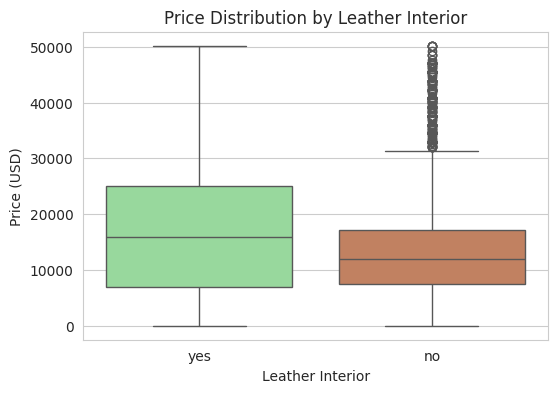

In [132]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_filtered, 
    x='leather_interior', 
    y='price', 
    palette=["#8EE294", "#D17C51"]
)
plt.title("Price Distribution by Leather Interior")
plt.xlabel("Leather Interior")
plt.ylabel("Price (USD)")
plt.show()

💡 **Observations:**  
- Cars with leather interior have a higher mean price than those without.